# Méthode d'ensemble

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [28]:
knn_bags = []
scores = []

N = 31

for i in range(1, N):
    knn_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=9), n_estimators=i)
    knn_bag.fit(X_train, y_train)
    knn_bags.append(knn_bag)

    score = knn_bag.score(X_test, y_test)
    scores.append(score)

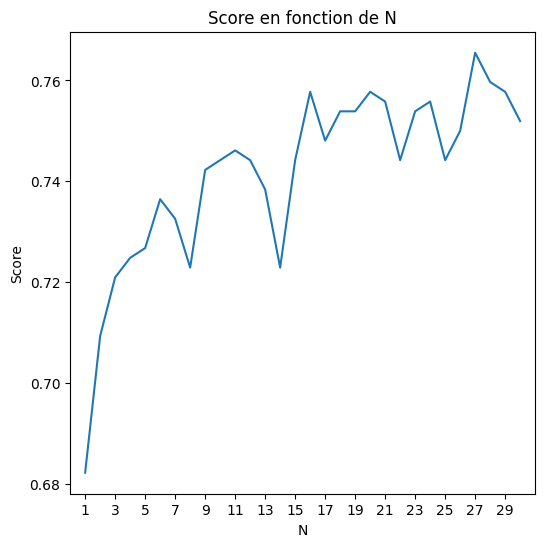

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(np.arange(1, N, 1), scores)
plt.title("Score en fonction de N")
plt.xlabel("N")
plt.ylabel("Score")
plt.xticks(np.arange(1, N, 2))
plt.xlim((0, N))
plt.show()

Score du meilleur modèle (avec n: 27): 0.77


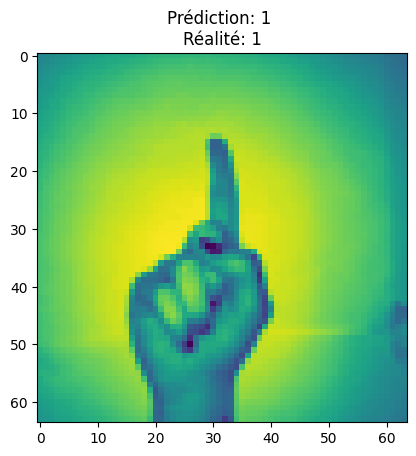

In [30]:
best_knn_bag = knn_bags[scores.index(max(scores))]
print(f"Score du meilleur modèle (avec n: {scores.index(max(scores))+1}): {max(scores):.2f}")

prediction = best_knn_bag.predict([X_test[0]])
plt.imshow(X_test[0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
plt.title(f"Prédiction: {prediction[0]} \nRéalité: {y_test[0]}")
plt.show()

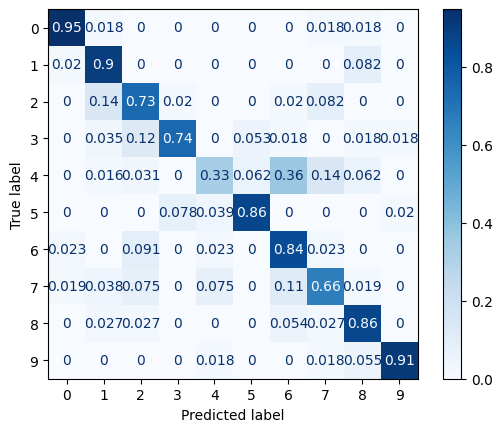

In [31]:
ConfusionMatrixDisplay.from_estimator(best_knn_bag, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()

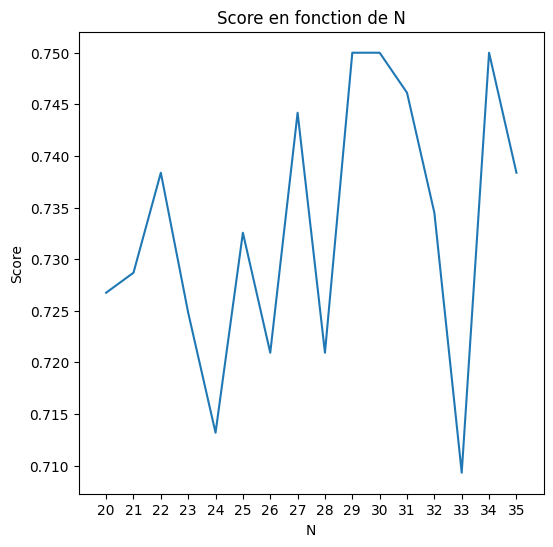

Score du meilleur modèle (avec n: 29): 0.75


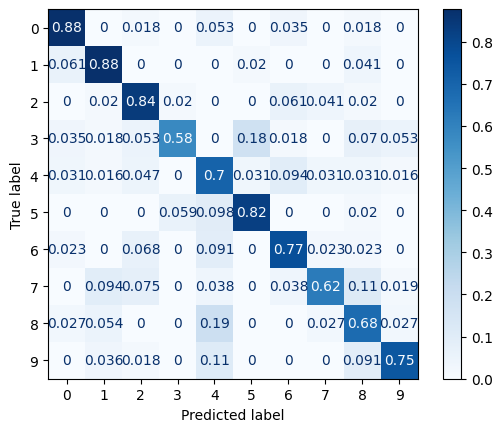

In [23]:
tree_bags = []
scores = []
begin = 20
N = 36

for n in range(begin, N):
    tree_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n)
    tree_bag.fit(X_train, y_train)
    tree_bags.append(tree_bag)

    score = tree_bag.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize=(6, 6))
plt.plot(np.arange(begin, N, 1), scores)
plt.title("Score en fonction de N")
plt.xlabel("N")
plt.ylabel("Score")
plt.xticks(np.arange(begin, N, 1))
plt.xlim((begin-1, N))
plt.show()

best_tree_bag = tree_bags[scores.index(max(scores))]
print(f"Score du meilleur modèle (avec n: {scores.index(max(scores))+begin}): {max(scores):.2f}")

ConfusionMatrixDisplay.from_estimator(best_tree_bag, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()

Score du meilleur modèle (avec n: 38): 0.80


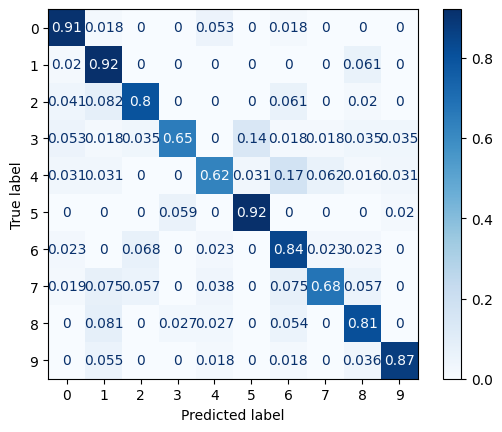

In [32]:
forests = []
scores = []
N = 51

for n in range(1, N):
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train, y_train)
    forests.append(forest)

    score = forest.score(X_test, y_test)
    scores.append(score)

best_forest = forests[scores.index(max(scores))]
print(f"Score du meilleur modèle (avec n: {scores.index(max(scores))+1}): {max(scores):.2f}")

ConfusionMatrixDisplay.from_estimator(best_forest, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()

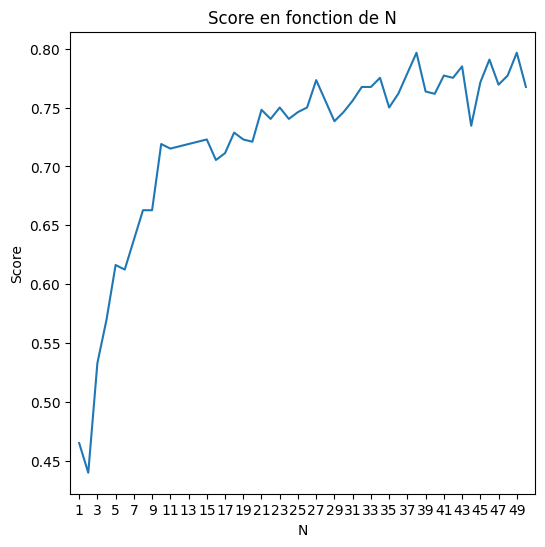

In [33]:
plt.figure(figsize=(6, 6))
plt.plot(np.arange(1, N, 1), scores)
plt.title("Score en fonction de N")
plt.xlabel("N")
plt.ylabel("Score")
plt.xticks(np.arange(1, N, 2))
plt.xlim((0, N))
plt.show()